In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# If a user watches 'star wars' movie recommend user with similar kind of movies based on ratings of star wars.

In [3]:
links = pd.read_csv('links.csv')
movies = pd.read_csv('movies.csv')
ratings = pd.read_csv('ratings.csv')

In [4]:
print('links :',links.shape)
print('movies :',movies.shape)
print('ratings :',ratings.shape)


('links :', (9742, 3))
('movies :', (9742, 3))
('ratings :', (100836, 4))


In [5]:
links.head(3)

,movieId,imdbId,tmdbId
0,1,114709,862.0
1,2,113497,8844.0
2,3,113228,15602.0


In [6]:
movies.head(3)

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance


In [7]:
ratings.head(3)

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224


In [8]:
# merge all 3 dataframes
data = pd.merge(pd.merge(links,movies,on='movieId'),ratings,on='movieId')
data.head(3)

,movieId,imdbId,tmdbId,title,genres,userId,rating,timestamp
0,1,114709,862.0,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1,4.0,964982703
1,1,114709,862.0,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,5,4.0,847434962
2,1,114709,862.0,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,7,4.5,1106635946


In [9]:
# calculate average rating for each movie:
ratingmovie = pd.DataFrame(data.groupby('title')['rating'].mean())
ratingmovie.head(3)

,rating
title,
'71 (2014),4.0
'Hellboy': The Seeds of Creation (2004),4.0
'Round Midnight (1986),3.5


In [10]:
# calculate no. of ratings given for each movie:
ratingmovie['total_count_ofratings'] = pd.DataFrame(data.groupby('title')['rating'].count())
ratingmovie.head(3)

,rating,total_count_ofratings
title,,
'71 (2014),4.0,1
'Hellboy': The Seeds of Creation (2004),4.0,1
'Round Midnight (1986),3.5,2


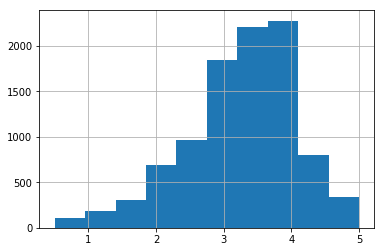

In [11]:
# Visualize data 
ratingmovie['rating'].hist()
# can see that most of rating range from 2.7 to 4

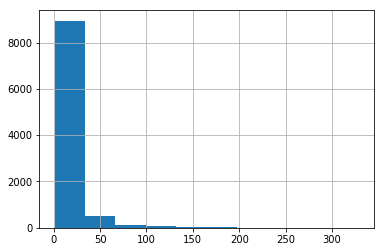

In [12]:
ratingmovie['total_count_ofratings'].hist()

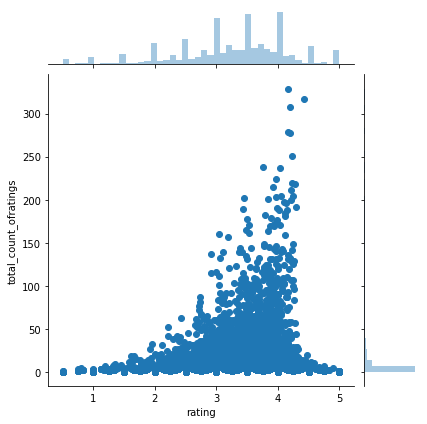

In [13]:
# check relationship between movie rating & total no. of ratings given :
sns.jointplot(x='rating', y = 'total_count_ofratings', data = ratingmovie)
# can see that there is positive relation between total no. of ratings and average rating of a movie
# As te total no. of ratings increase, the average rating per movie also increases.

In [14]:
# As we are concentrating on each user's preference, we should create a dataframe where titles are in a single column, each user id as seperate single columns. Ratings would be the values. so this dataframe shows rating of every user for all movies.
matrix = data.pivot_table(index='userId',columns='title',values='rating')
matrix.head(3)

title,'71 (2014),'Hellboy': The Seeds of Creation (2004),'Round Midnight (1986),'Salem's Lot (2004),'Til There Was You (1997),'Tis the Season for Love (2015),"'burbs, The (1989)",'night Mother (1986),(500) Days of Summer (2009),*batteries not included (1987),...,Zulu (2013),[REC] (2007),[REC]² (2009),[REC]³ 3 Génesis (2012),anohana: The Flower We Saw That Day - The Movie (2013),eXistenZ (1999),xXx (2002),xXx: State of the Union (2005),¡Three Amigos! (1986),À nous la liberté (Freedom for Us) (1931)
userId,,,,,,,,,,,,,,,,,,,,,
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [15]:
# Considering 2 movies which user has watched - malcomx,interiors

In [16]:
# consider 2 movies which user has watched. lets find correlation between ratings of these 2 movies & rest of the movies.
# The concept we use here is we find correlation between the rating of movies user has watched and the ratings of other movies. So recommneder system should recommend similar movies to user based on this correlation. Higher the correlation higher recommnedation to user

In [17]:
# Movie - malcomx
malcomx = matrix['Malcolm X (1992)']
malcomx.unique()

array([nan, 2.5, 4. , 5. ])

In [18]:
# Movie - interiors
interiors = matrix['Interiors (1978)']
interiors.unique()

array([nan, 3.5, 4. , 5. ])

In [19]:
# find correlation between ratings of round midnight movie with all other movies ratings
similar_to_malcomx = matrix.corrwith(malcomx)
similar_to_malcomx

C:\Users\Dell\Anaconda2\lib\site-packages\numpy\lib\function_base.py:2522: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar)
C:\Users\Dell\Anaconda2\lib\site-packages\numpy\lib\function_base.py:2451: RuntimeWarning: divide by zero encountered in true_divide
  c *= np.true_divide(1, fact)


title
'71 (2014)                                                                                       NaN
'Hellboy': The Seeds of Creation (2004)                                                          NaN
'Round Midnight (1986)                                                                           NaN
'Salem's Lot (2004)                                                                              NaN
'Til There Was You (1997)                                                                        NaN
'Tis the Season for Love (2015)                                                                  NaN
'burbs, The (1989)                                                                               NaN
'night Mother (1986)                                                                             NaN
(500) Days of Summer (2009)                                                                 0.981981
*batteries not included (1987)                                                       

In [20]:
# convert to dataframe to visualize better
similar_to_similar_to_malcomxdf = pd.DataFrame(similar_to_malcomx,columns=['correlation_with_malcomx'])
similar_to_similar_to_malcomxdf.dropna(inplace=True)
similar_to_similar_to_malcomxdf.head()

,correlation_with_malcomx
title,
(500) Days of Summer (2009),0.981981
10 Things I Hate About You (1999),-0.115470
"10,000 BC (2008)",1.000000
101 Dalmatians (1996),-0.174078
12 Angry Men (1957),-0.333333


In [21]:
# finding correlation betwen rating of movie interiors with ratings of other movies
# convert to dataframe to visualize better
similar_to_interiors = matrix.corrwith(interiors)
similar_to_interiors_df = pd.DataFrame(similar_to_interiors,columns=['correlation_with_interiors'])
similar_to_interiors_df.dropna(inplace=True)
similar_to_interiors_df.head()

,correlation_with_interiors
title,
2010: The Year We Make Contact (1984),1.0
"400 Blows, The (Les quatre cents coups) (1959)",-1.0
"Abyss, The (1989)",1.0
"Addams Family, The (1991)",1.0
Airplane! (1980),-1.0


In [22]:
# Issue : there is an issue here. though we find correlation, there might be movies which have high ratings but the no ratings are less. This simply reflects in the recommendation as the rating is high. so need to give a capping on no. of ratings.
# From previous graph we observe that there a rapid downfall from count of 30 ratings
# so lets limit the no. of ratings to 40.
# Need to merge these dataframes with ratings df

sm_mal = similar_to_similar_to_malcomxdf.merge(ratingmovie,on='title')
rec_malcomx = sm_mal[sm_mal['total_count_ofratings']>40].sort_values(by ='correlation_with_malcomx',ascending=False)
# These are the recommnedations for movies similar to malcomx based on its rating
rec_malcomx.head(5)

,correlation_with_malcomx,rating,total_count_ofratings
title,,,
Wild Wild West (1999),1.0,2.207547,53
"Boondock Saints, The (2000)",1.0,4.220930,43
"Untouchables, The (1987)",1.0,3.938462,65
Austin Powers in Goldmember (2002),1.0,2.846154,65
"Few Good Men, A (1992)",1.0,3.789474,57


In [23]:
# Find similar recommendations for movie interiors based on its rating
sm_int = similar_to_interiors_df.merge(ratingmovie,on='title')
rec_int = sm_int[sm_int['total_count_ofratings']>30].sort_values(by='correlation_with_interiors',ascending = False)
rec_int.head(5)

,correlation_with_interiors,rating,total_count_ofratings
title,,,
"Abyss, The (1989)",1.0,3.475806,62
Dune (1984),1.0,3.432432,37
My Cousin Vinny (1992),1.0,3.262712,59
Misery (1990),1.0,3.840909,44
Mary Poppins (1964),1.0,3.887324,71
